In [8]:
import pandas as pd 
df=pd.read_csv("wine_quality.csv")
df.head()


,acidity,sugar,pH,alcohol,density,quality
0,5.822205,7.530753,2.840060,8.178009,0.997923,6
1,3.958912,1.870711,3.236432,12.052521,0.982155,3
2,4.058777,5.780638,3.679162,8.269121,1.048007,8
3,5.423008,9.650478,3.784453,10.703582,0.995452,6
4,6.771268,11.705997,3.175794,13.576560,1.031382,5


In [9]:
df.isnull().sum()

acidity    0
sugar      0
pH         0
alcohol    0
density    0
quality    0
dtype: int64

In [10]:
df.duplicated().sum()


np.int64(0)

In [11]:
df.columns

Index(['acidity', 'sugar', 'pH', 'alcohol', 'density', 'quality'], dtype='object')

In [12]:
df.shape

(200, 6)

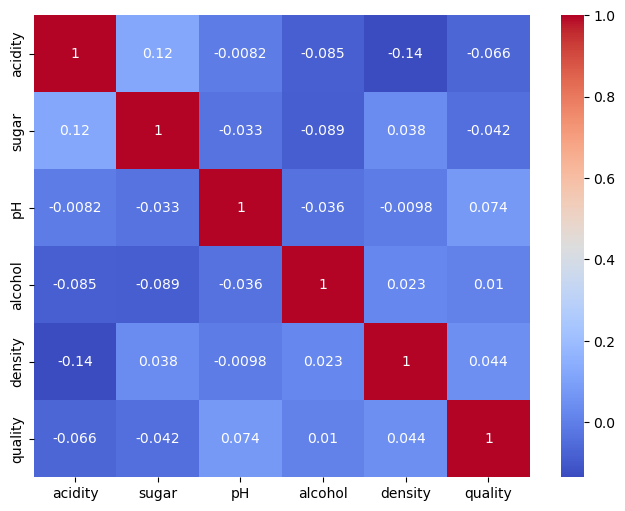

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


In [14]:
X = df.drop('quality', axis=1)
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()


scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)


model.fit(X_train_scaled, y_train)


c:\Program Files\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test_scaled)


c:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3000
Macro F1 Score: 0.2694
Weighted F1 Score: 0.2831
Confusion Matrix:
[[2 0 1 1 2 0]
 [2 3 0 2 0 0]
 [0 2 2 1 2 0]
 [1 0 1 4 2 0]
 [2 0 2 1 1 0]
 [2 0 1 2 1 0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.22      0.33      0.27         6
           4       0.60      0.43      0.50         7
           5       0.29      0.29      0.29         7
           6       0.36      0.50      0.42         8
           7       0.12      0.17      0.14         6
           8       0.00      0.00      0.00         6

    accuracy                           0.30        40
   macro avg       0.27      0.29      0.27        40
weighted avg       0.28      0.30      0.28        40



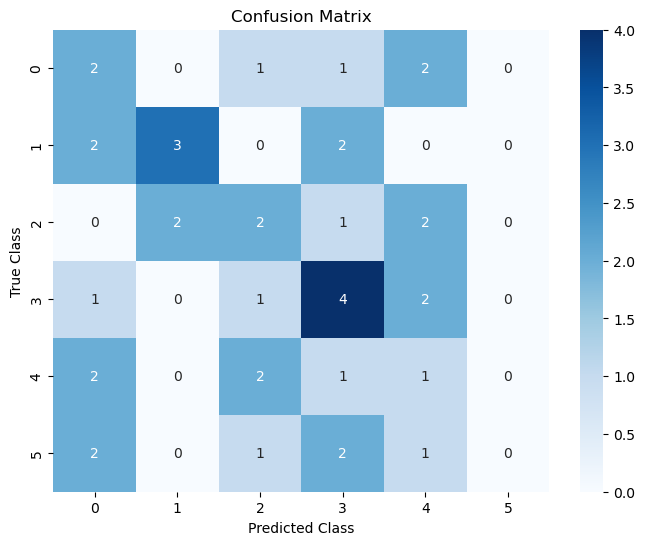

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)


macro_f1 = f1_score(y_test, y_pred, average='macro')
weighted_f1 = f1_score(y_test, y_pred, average='weighted')


conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Macro F1 Score: {macro_f1:.4f}')
print(f'Weighted F1 Score: {weighted_f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)




plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()
